### Remove nan duplicates in the attributes and add mean mmp per unit

In [1]:
import numpy as np
import matplotlib as mpl
import copy
import matplotlib.pyplot as plt
import os

In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

In [2]:
d50 = 0.00031
# folnam = 'agubh2-100m-nanreplace'
folnam = 'agubh2_agu22_PATCH2'
#init = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays/Summer-bpkg-redo/JULY142022'
init = f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays-fall23-patch2/{folnam}'

og_shape = int(input('what is the original shape of the array output from the bar picker?:'))
for root, dirs, files in os.walk(init):
    for file in files:
        bar = np.load(os.path.join(root, file), allow_pickle = True)
        med_mmp =(1000*(bar[:, :, 4]**2))/(1650*((18*(np.log10(4*bar[:, :, 3]/d50)))**2)*d50)##### modified mobility parameter
        mmp_replacenan = copy.deepcopy(med_mmp)

        for i in range (0, mmp_replacenan.shape[0]-1):
            for j in range (0, mmp_replacenan.shape[1]):
                if np.logical_and(bar[i, j, 0] == bar[i+1, j, 0], mmp_replacenan[i, j] <= mmp_replacenan[i+1, j]):
                    mmp_replacenan[i, j] = np.nan
        
        ## comcatenate the mmp now
        if bar.shape[2] == og_shape: 
            withfacies = np.concatenate((bar, np.expand_dims(mmp_replacenan, 2)), axis=2)
        else:
            bar[:, :, -1] = np.expand_dims(mmp_replacenan, 2)
            withfacies = copy.deepcopy(bar)
        np.save(f'{os.path.join(root, file)}', withfacies, allow_pickle = True)

what is the original shape of the array output from the bar picker?: 5


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [3]:
test=np.load('/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/barpkg-arrays-fall23-patch/agubh2_agu22_PATCH/100/100-FP-5-0.npy')

(array([298., 215., 119.,  83.,  61.,  39.,   3.,   3.,   4.,   9.]),
 array([0.00933499, 0.10914518, 0.20895536, 0.30876555, 0.40857574,
        0.50838592, 0.60819611, 0.70800629, 0.80781648, 0.90762667,
        1.00743685]),
 <BarContainer object of 10 artists>)

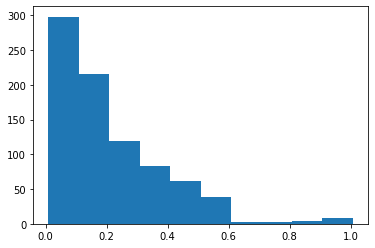

In [6]:
plt.hist(test[:, :, -1].ravel())